In [13]:
library(tidyr)
library(dplyr)
library(ggplot2)

In [14]:

nutri = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_nutrients.csv", 
                header = T
)
head(nutri, n=2)
dim(nutri)


sst = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_sst_chla.csv", 
                header = T
)
head(sst, n=2)
dim(sst)

tcm = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_TCM_combo.csv", 
                header = T
)
head(tcm, n=2)
dim(tcm)


live = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_apal_live.csv", 
                header = T
)
head(live, n=2)
dim(live)

,Samp_trip,file,zhang_ID,reef,collection_date,Month,Year,Si.uM.,NO2.uM.,N.N.uM.,⋯,date_processed,STD,Wash,watercolumn,transect,filtered,chloroform,dilution_factor,latitude,longitude
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,1,POR_nutrients_samp_trip1,Zhang-03,cf,26-Nov-18,November,2018,1.153,0.023,0.673,⋯,12/20/18,LNSW,LNSW,bottom,AC12,yes,yes,NA,NA,NA
2,2,POR_nutrients_samp_trip2,Zhang-01,cf,28-Feb-19,February,2019,0.335,0.022,0.996,⋯,3/7/19,LNSW,LNSW,bottom,Ap 35,yes,yes,NA,NA,NA


[1] 80 23

,reef,collection_date,Year,Month,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,pr,14-Nov-18,2018,November,24.985,-80.416,0.9965124,0.6535258,27.42548,0.1301989
2,gr,15-Nov-18,2018,November,25.110,-80.304,0.7318034,0.4607393,27.50922,0.1089550


[1] 20 10

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,place
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,22-Oct-18,36.25,156.41,-33.22,14.51,23.4131,cf,top
2,22-Oct-18,36.25,156.39,-33.22,14.52,23.2627,cf,top


[1] 730278      8

,reef,Genotype,Fragment_num,collection_date,day,Month,Year,Survey.,Fragment_number,LiveFrag,ColType,L,W,H,live_per,Adjusted.Area,S01FragCount
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>
1,gr,ML2,1,15-Jun-18,15,June,2018,1,A,1,L,7,NA,NA,100.00%,27.2065,7
2,gr,ML2,1,15-Jun-18,15,June,2018,1,B,1,L,8,NA,NA,100.00%,23.2441,7


[1] 9013   17

In [15]:
#load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_treatment_4_analysis.RData")
 #write.csv(POR_treat_4_analysis, file="/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_seq.csv")

In [16]:
#added column header
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_seq.csv", 
                header = T
)
head(meta, n=2)
dim(meta)

,sample_ID,bag_num,sample_ID2,Fragment_number,Health,collection_date,Month,Year,Samp_trip,joining_info,⋯,sampling_trip,X,colour_reef,colour_genotype,colour_reef_genotype,colour_timepoint,colour_timepoint_reef,cluster_latitude,cluster_longitude,cluster_depth
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,apal_cf_gML2_cl78_frB_AH_2019-06-25,bagnumber-1009,apal_cf_gML2_cl78_frB_AH_2019-06-25,B,AH,25-Jun-19,June,2019,Trip_3,ML2_Cluster_78_B_cf,⋯,3,NA,blue4,orangered,yellow3,maroon2,black,25.2207,-80.21037,20.9
2,apal_cf_gML2_cl78_fr3_AH_2019-06-25,bagnumber-1010,apal_cf_gML2_cl78_fr3_AH_2019-06-25,3,AH,25-Jun-19,June,2019,Trip_3,ML2_Cluster_78_3_cf,⋯,3,NA,blue4,orangered,yellow3,maroon2,black,25.2207,-80.21037,20.9


[1] 363  26

## Add nutrients data

In [17]:
head(nutri, n=2)
dim(nutri)

,Samp_trip,file,zhang_ID,reef,collection_date,Month,Year,Si.uM.,NO2.uM.,N.N.uM.,⋯,date_processed,STD,Wash,watercolumn,transect,filtered,chloroform,dilution_factor,latitude,longitude
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,1,POR_nutrients_samp_trip1,Zhang-03,cf,26-Nov-18,November,2018,1.153,0.023,0.673,⋯,12/20/18,LNSW,LNSW,bottom,AC12,yes,yes,NA,NA,NA
2,2,POR_nutrients_samp_trip2,Zhang-01,cf,28-Feb-19,February,2019,0.335,0.022,0.996,⋯,3/7/19,LNSW,LNSW,bottom,Ap 35,yes,yes,NA,NA,NA


[1] 80 23

In [18]:
nutri_sum= nutri %>%
filter(chloroform=="yes") %>%
filter(filtered=="yes") %>%
select(-c(STD, Wash, file, zhang_ID, latitude,longitude, NH4.uM.,  dilution_factor, Samp_trip)) %>%
group_by(collection_date, reef) %>%
summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE)))  %>%
right_join(meta)

head(nutri_sum, n=2)

`summarise()` has grouped output by 'collection_date'. You can override using
the `.groups` argument.
Joining with `by = join_by(collection_date, reef, Year)`


collection_date,reef,Year,Si.uM.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,sample_ID,bag_num,⋯,sampling_trip,X,colour_reef,colour_genotype,colour_reef_genotype,colour_timepoint,colour_timepoint_reef,cluster_latitude,cluster_longitude,cluster_depth
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1-Mar-19,pr,2019,0.504,0.015,0.729,0.714,0.037,apal_pr_gCN2_cl75_fr3_AH_2019-03-01,bagnumber-584,⋯,2,NA,greenyellow,blue4,maroon2,blue4,orangered,24.98454,-80.41658,15.7
1-Mar-19,pr,2019,0.504,0.015,0.729,0.714,0.037,apal_pr_gCN2_cl75_fr4_AH_2019-03-01,bagnumber-585,⋯,2,NA,greenyellow,blue4,maroon2,blue4,orangered,24.98454,-80.41658,15.7


## Add temperature and chla

In [19]:
sst_sum=nutri_sum %>%
left_join(sst, join_by( collection_date,reef))

head(sst_sum, n=2)
dim(sst_sum)

collection_date,reef,Year.x,Si.uM.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,sample_ID,bag_num,⋯,cluster_longitude,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-Mar-19,pr,2019,0.504,0.015,0.729,0.714,0.037,apal_pr_gCN2_cl75_fr3_AH_2019-03-01,bagnumber-584,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
1-Mar-19,pr,2019,0.504,0.015,0.729,0.714,0.037,apal_pr_gCN2_cl75_fr4_AH_2019-03-01,bagnumber-585,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


[1] 363  39

In [20]:
head (nutri_sum %>%
gather(key = metric, value = Nutrients, c("Si.uM.", "NO2.uM.", "N.N.uM.", "NO3.uM.", "PO4.uM.")) %>%
  mutate(metric = factor(metric, levels = c("Si.uM.", "NO2.uM.", "N.N.uM.", "NO3.uM.", "PO4.uM.")))  %>%
separate(col = Samp_trip, into = c("trip_lab", "trip_num"), sep = "_") %>%
  select(-trip_lab))

collection_date,reef,Year,sample_ID,bag_num,sample_ID2,Fragment_number,Health,Month,trip_num,⋯,colour_reef,colour_genotype,colour_reef_genotype,colour_timepoint,colour_timepoint_reef,cluster_latitude,cluster_longitude,cluster_depth,metric,Nutrients
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1-Mar-19,pr,2019,apal_pr_gCN2_cl75_fr3_AH_2019-03-01,bagnumber-584,apal_pr_gCN2_cl75_fr3_AH_2019-03-01,3,AH,March,2,⋯,greenyellow,blue4,maroon2,blue4,orangered,24.98454,-80.41658,15.7,Si.uM.,0.504
1-Mar-19,pr,2019,apal_pr_gCN2_cl75_fr4_AH_2019-03-01,bagnumber-585,apal_pr_gCN2_cl75_fr4_AH_2019-03-01,4,AH,March,2,⋯,greenyellow,blue4,maroon2,blue4,orangered,24.98454,-80.41658,15.7,Si.uM.,0.504
1-Mar-19,pr,2019,apal_pr_gCN2_cl75_fr7_AH_2019-03-01,bagnumber-586,apal_pr_gCN2_cl75_fr7_AH_2019-03-01,7,AH,March,2,⋯,greenyellow,blue4,maroon2,blue4,orangered,24.98454,-80.41658,15.7,Si.uM.,0.504
1-Mar-19,pr,2019,apal_pr_gCN2_cl79_fr3_AH_2019-03-01,bagnumber-590,apal_pr_gCN2_cl79_fr3_AH_2019-03-01,3,AH,March,2,⋯,greenyellow,blue4,maroon2,blue4,orangered,24.98455,-80.41659,16.7,Si.uM.,0.504
1-Mar-19,pr,2019,apal_pr_gCN2_cl79_fr4_AH_2019-03-01,bagnumber-591,apal_pr_gCN2_cl79_fr4_AH_2019-03-01,4,AH,March,2,⋯,greenyellow,blue4,maroon2,blue4,orangered,24.98455,-80.41659,16.7,Si.uM.,0.504
1-Mar-19,pr,2019,apal_pr_gCN2_cl79_fr6_AH_2019-03-01,bagnumber-592,apal_pr_gCN2_cl79_fr6_AH_2019-03-01,6,AH,March,2,⋯,greenyellow,blue4,maroon2,blue4,orangered,24.98455,-80.41659,16.7,Si.uM.,0.504


Warning message in geom_point(aes(fill = reef), height = 0, width = 0.2, pch = 21):
“Ignoring unknown parameters: `height` and `width`”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


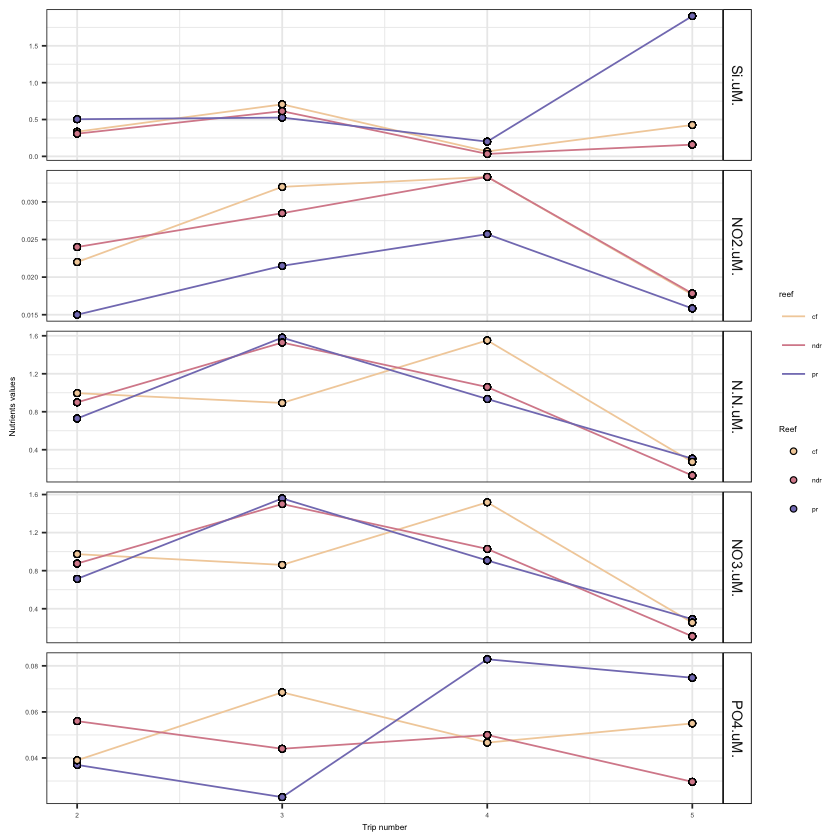

In [21]:
nutri_sum %>%

gather(key = metric, value = Nutrients, c("Si.uM.", "NO2.uM.", "N.N.uM.", "NO3.uM.", "PO4.uM.")) %>%
  mutate(metric = factor(metric, levels = c("Si.uM.", "NO2.uM.", "N.N.uM.", "NO3.uM.", "PO4.uM."))) %>%
separate(col = Samp_trip, into = c("trip_lab", "trip_num"), sep = "_") %>%
  ggplot(aes(x = as.numeric(trip_num), y = Nutrients, group=reef)) +
geom_line(aes(color = reef)) +
scale_fill_manual(values=c("#f2d0a9","#d88c9a","#837dbe")) +
scale_color_manual(values=c("#f2d0a9","#d88c9a","#837dbe")) +
#geom_boxplot()  +
geom_point(aes(fill = reef), height = 0, width = .2, pch=21) +
facet_grid(metric~., scales = "free_y") +
xlab("Trip number") +
ylab("Nutrients values") +
theme_bw() +
guides(fill=guide_legend(title="Reef")) +
theme(legend.text =element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 

ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/nutri_fig.png", width = 5, height = 4.5, units = "in", dpi=300)     

## percent live fragment 

In [22]:
live_sum= live %>%
group_by(collection_date, reef, Genotype, Fragment_number, Month, Year) %>%
summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE)))  %>%
right_join(sst_sum)
head(live_sum, n=2)

`summarise()` has grouped output by 'collection_date', 'reef', 'Genotype',
'Fragment_number', 'Month'. You can override using the `.groups` argument.
Joining with `by = join_by(collection_date, reef, Genotype, Fragment_number)`


collection_date,reef,Genotype,Fragment_number,Month,Year,Fragment_num,day,Survey.,LiveFrag,⋯,cluster_longitude,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-Mar-19,pr,CN2,3,March,2019,78.33333,1,5,1,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
1-Mar-19,pr,CN2,3,March,2019,78.33333,1,5,1,⋯,-80.41659,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


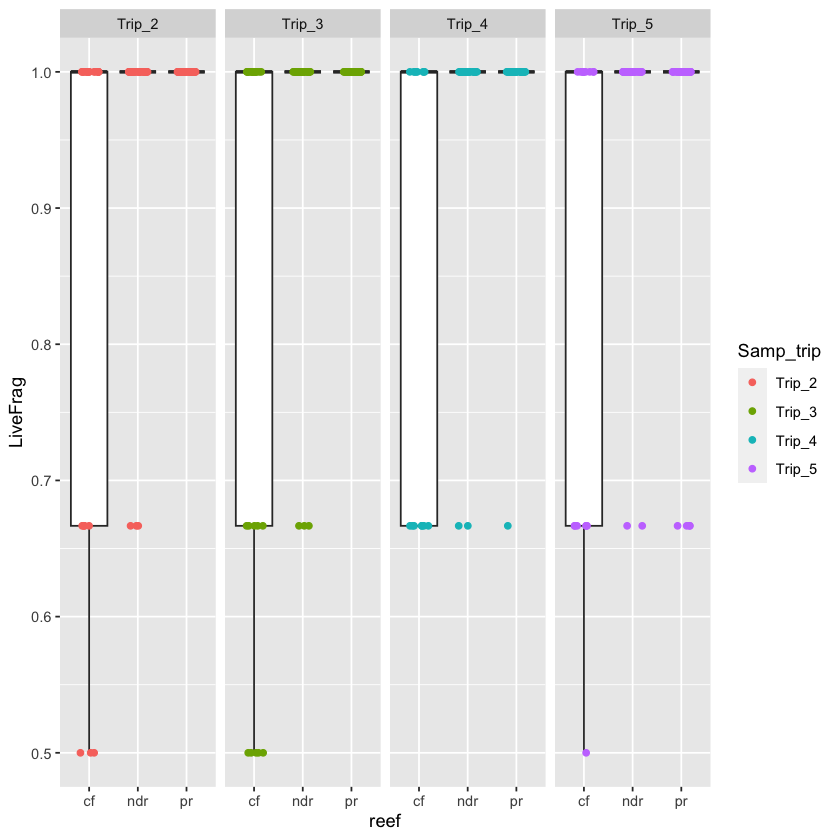

In [23]:
live_sum %>%
 ggplot(aes(x = reef, y = LiveFrag))  +
  geom_boxplot(outlier.color = NA)  +
geom_jitter(aes(color = Samp_trip), height = 0, width = .2) +
facet_grid(.~Samp_trip)


In [24]:
tcm_sum= tcm %>%
filter(Speed.cm.s. <=25) %>%
group_by(collection_date) %>%
summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE))) %>%
right_join(live_sum) 
head(tcm_sum, n=2)

Joining with `by = join_by(collection_date)`


collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_longitude,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,March,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,March,⋯,-80.41659,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


In [25]:
all_meta=tcm_sum %>%
relocate(bag_num, .before = collection_date)
dim(all_meta)

[1] 363  55

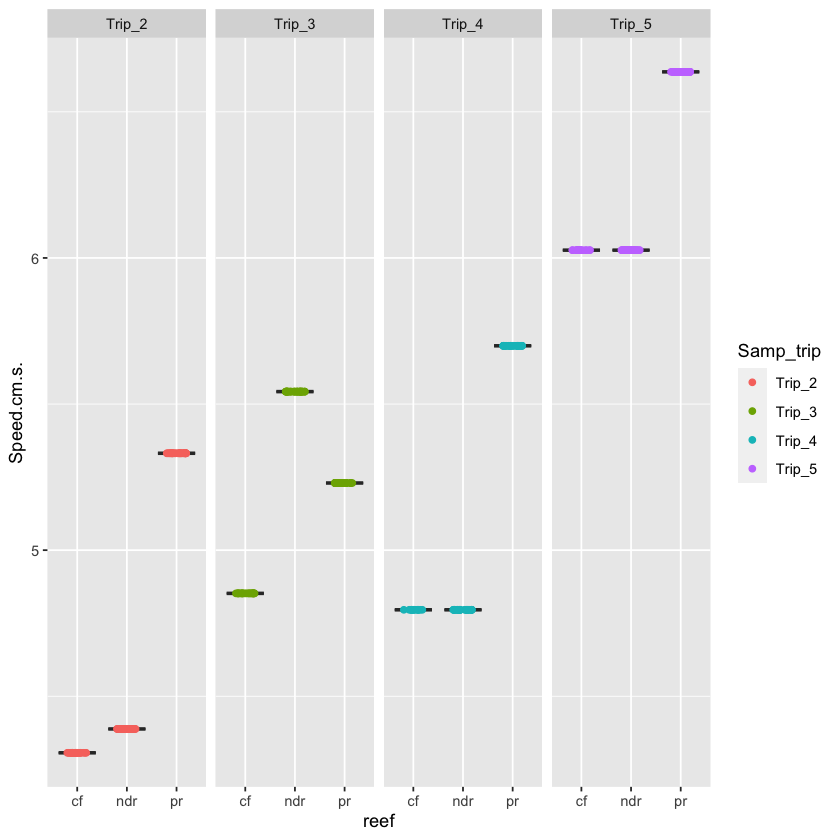

In [26]:
tcm_sum %>%
 ggplot(aes(x = reef, y = Speed.cm.s.))  +
  geom_boxplot(outlier.color = NA)  +
geom_jitter(aes(color = Samp_trip), height = 0, width = .2) +
facet_grid(.~Samp_trip)

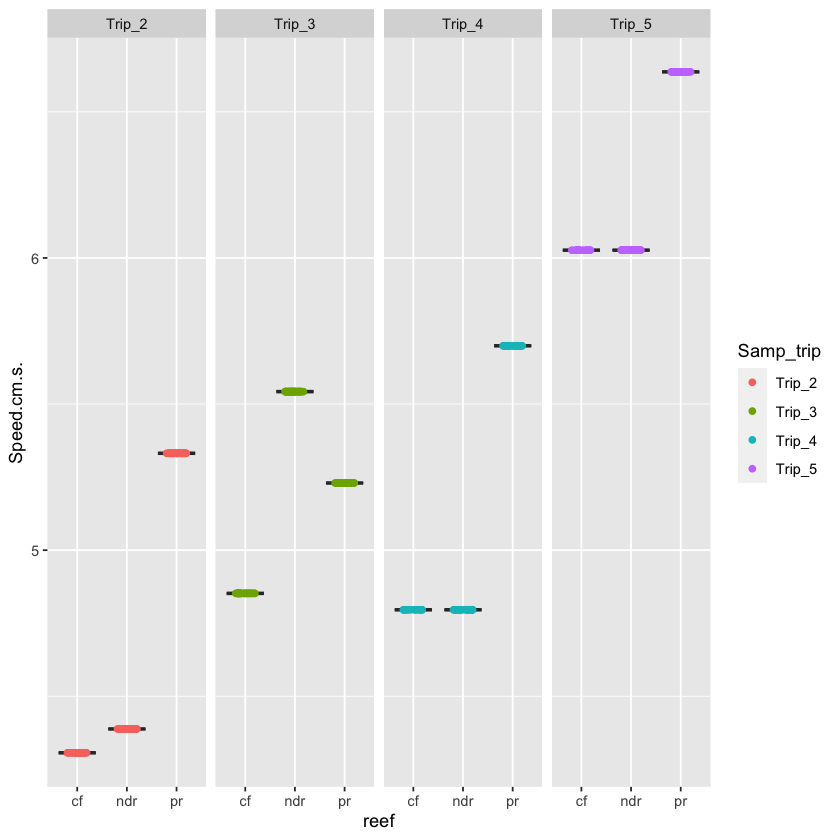

In [27]:
tcm_sum %>%
 ggplot(aes(x = reef, y = Speed.cm.s.))  +
  geom_boxplot(outlier.color = NA)  +
geom_jitter(aes(color = Samp_trip), height = 0, width = .2) +
facet_grid(.~Samp_trip)

In [28]:
tcm = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_TCM_combo.csv", 
                header = T, stringsAsFactors=TRUE
)
head(tcm, n=2)
dim(tcm)

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,place
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,22-Oct-18,36.25,156.41,-33.22,14.51,23.4131,cf,top
2,22-Oct-18,36.25,156.39,-33.22,14.52,23.2627,cf,top


[1] 730278      8

In [29]:
temp = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/sst_outplant_daily.csv", 
                header = T, stringsAsFactors=TRUE
)
head(temp, n=2)
dim(temp)


chl = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/chla_sst_outplant_stations.csv", 
                header = T, stringsAsFactors=TRUE
)
head(chl, n=2)
dim(chl)

,date,decimal_year,avg_sst,reef
,<fct>,<dbl>,<dbl>,<fct>
1,1-Jan-19,2019.003,24.96226,cf
2,2-Jan-19,2019.005,25.10979,cf


[1] 1095    4

,reef,Date,Lat_decimal,Long_decimal,avg_chla_8day_.mg.m.3.,sd_chla_8day_.mg.m.3.,avg_chla_monthly_.mg.m.3.,sd_chla_monthly_.mg.m.3.,avg.SST..deg.C.,sd.SST..deg.C.
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cf,26-Nov-18,25.221,-80.21,1.1299891,0.6305609,1.481547,0.8310220,26.61859,0.1554472
2,cf,28-Feb-19,25.221,-80.21,0.6960258,0.4539086,1.249507,0.8486629,25.96821,0.1514858


[1] 20 10

In [30]:
chl_all = chl %>%
  separate(col = Date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
  select(-date)
head(chl_all)

,reef,month,year,Lat_decimal,Long_decimal,avg_chla_8day_.mg.m.3.,sd_chla_8day_.mg.m.3.,avg_chla_monthly_.mg.m.3.,sd_chla_monthly_.mg.m.3.,avg.SST..deg.C.,sd.SST..deg.C.,Date
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,cf,Nov,2018,25.221,-80.210,1.1299891,0.6305609,1.481547,0.8310220,26.61859,0.1554472,2018-Nov-26
2,cf,Feb,2019,25.221,-80.210,0.6960258,0.4539086,1.249507,0.8486629,25.96821,0.1514858,2019-Feb-28
3,cf,Jun,2019,25.221,-80.210,1.7920917,0.3763544,1.840000,1.0261407,29.63623,0.5081026,2019-Jun-25
4,cf,Sep,2019,25.221,-80.210,1.1930631,0.0000000,1.393782,0.8628705,29.41868,0.4285187,2019-Sep-25
5,cf,Nov,2019,25.221,-80.210,0.9899462,0.1509655,1.314622,0.8991632,27.62378,0.2019326,2019-Nov-18
6,gr,Nov,2018,25.110,-80.304,0.7318034,0.4607393,1.299315,0.7880717,27.50922,0.1089550,2018-Nov-15


In [31]:
temp_all = temp %>%
  separate(col = date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
  select(-date)
head(temp_all)



,month,year,decimal_year,avg_sst,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>
1,Jan,2019,2019.003,24.96226,cf,2019-Jan-1
2,Jan,2019,2019.005,25.10979,cf,2019-Jan-2
3,Jan,2019,2019.008,25.14815,cf,2019-Jan-3
4,Jan,2019,2019.011,25.41415,cf,2019-Jan-4
5,Jan,2019,2019.014,25.37185,cf,2019-Jan-5
6,Jan,2019,2019.016,25.49293,cf,2019-Jan-6


In [32]:
temp_all$Date <- as.Date(temp_all$Date, format = "%Y-%b-%d")
head(temp_all)

chl_all$Date <- as.Date(chl_all$Date, format = "%Y-%b-%d")
head(chl_all)

,month,year,decimal_year,avg_sst,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<date>
1,Jan,2019,2019.003,24.96226,cf,2019-01-01
2,Jan,2019,2019.005,25.10979,cf,2019-01-02
3,Jan,2019,2019.008,25.14815,cf,2019-01-03
4,Jan,2019,2019.011,25.41415,cf,2019-01-04
5,Jan,2019,2019.014,25.37185,cf,2019-01-05
6,Jan,2019,2019.016,25.49293,cf,2019-01-06


,reef,month,year,Lat_decimal,Long_decimal,avg_chla_8day_.mg.m.3.,sd_chla_8day_.mg.m.3.,avg_chla_monthly_.mg.m.3.,sd_chla_monthly_.mg.m.3.,avg.SST..deg.C.,sd.SST..deg.C.,Date
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,cf,Nov,2018,25.221,-80.210,1.1299891,0.6305609,1.481547,0.8310220,26.61859,0.1554472,2018-11-26
2,cf,Feb,2019,25.221,-80.210,0.6960258,0.4539086,1.249507,0.8486629,25.96821,0.1514858,2019-02-28
3,cf,Jun,2019,25.221,-80.210,1.7920917,0.3763544,1.840000,1.0261407,29.63623,0.5081026,2019-06-25
4,cf,Sep,2019,25.221,-80.210,1.1930631,0.0000000,1.393782,0.8628705,29.41868,0.4285187,2019-09-25
5,cf,Nov,2019,25.221,-80.210,0.9899462,0.1509655,1.314622,0.8991632,27.62378,0.2019326,2019-11-18
6,gr,Nov,2018,25.110,-80.304,0.7318034,0.4607393,1.299315,0.7880717,27.50922,0.1089550,2018-11-15


In [33]:
tcm_all = tcm %>%
  separate(col = collection_date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
  select(-date)


In [34]:
tcm_all$Date <- as.Date(tcm_all$Date, format = "%Y-%b-%d")
head(tcm_all)

,month,year,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,place,Date
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<date>
1,Oct,2018,36.25,156.41,-33.22,14.51,23.4131,cf,top,2018-10-22
2,Oct,2018,36.25,156.39,-33.22,14.52,23.2627,cf,top,2018-10-22
3,Oct,2018,36.25,156.37,-33.21,14.53,23.4311,cf,top,2018-10-22
4,Oct,2018,36.25,156.31,-33.20,14.57,23.3317,cf,top,2018-10-22
5,Oct,2018,36.25,156.41,-33.22,14.51,23.0338,cf,top,2018-10-22
6,Oct,2018,36.25,155.94,-33.10,14.78,22.7789,cf,top,2018-10-22


In [35]:
trip_dates <- tcm_sum %>%
  separate(col = collection_date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
  select(-date)

In [36]:
trip_dates$Date <- as.Date(trip_dates$Date, format = "%Y-%b-%d")


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


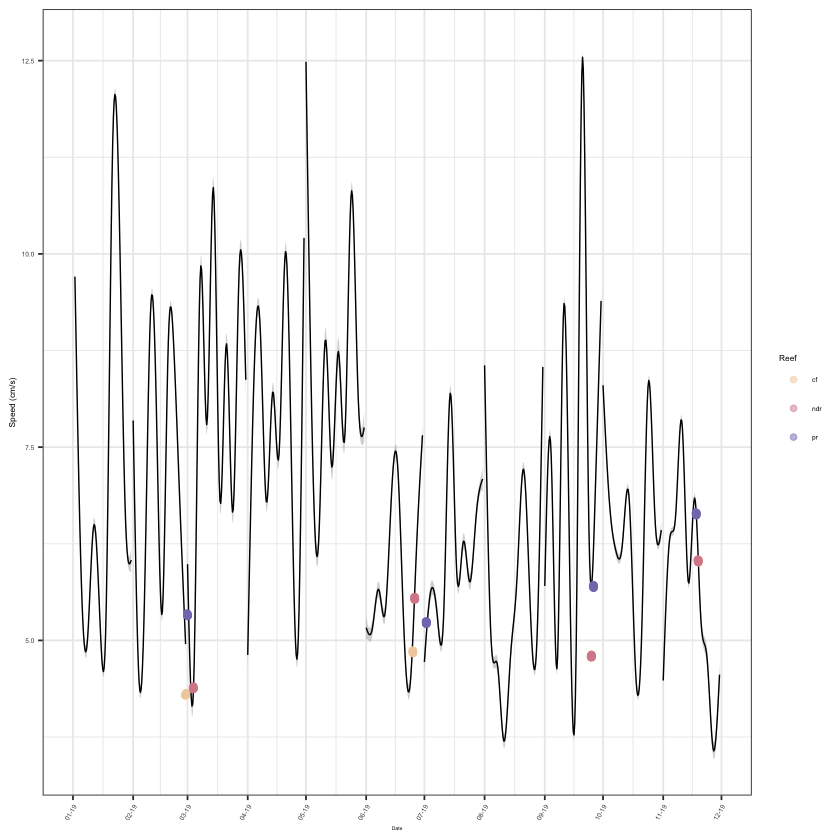

In [71]:
tcm_fig = tcm_all %>%
filter(year ==2019) %>%
filter(year !=2020) %>%
filter(Speed.cm.s. <=25) %>%
subset(Date> "2019-1-01" & Date < "2019-12-01") %>%
 ggplot(aes(x = as.Date(Date), y = Speed.cm.s., group=month)) +
geom_smooth(aes(x = as.Date(Date), y = Speed.cm.s.,), colour="black", size=0.4) +
geom_jitter(alpha = 0.5,aes(color=reef), data = trip_dates) +
theme_bw() +
scale_color_manual(values=c("#f2d0a9","#d88c9a","#837dbe")) +
scale_x_date(date_breaks ="1 month", date_labels ="%m-%y") +
#facet_grid(reef~.) +
theme(axis.text.x=element_text(angle = 60, hjust=1)) +
xlab("Date") +
ylab("Speed (cm/s)") +
guides(color=guide_legend(title="Reef")) +
theme(legend.text =element_text(size=3.7)) +
theme(axis.title.x = element_text(size = 3)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) 

tcm_fig
ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/tcm.png", width = 5, height = 4, units = "in", dpi=300)

In [38]:
head(temp_all)

,month,year,decimal_year,avg_sst,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<date>
1,Jan,2019,2019.003,24.96226,cf,2019-01-01
2,Jan,2019,2019.005,25.10979,cf,2019-01-02
3,Jan,2019,2019.008,25.14815,cf,2019-01-03
4,Jan,2019,2019.011,25.41415,cf,2019-01-04
5,Jan,2019,2019.014,25.37185,cf,2019-01-05
6,Jan,2019,2019.016,25.49293,cf,2019-01-06


In [39]:
head(sst)
head(trip_dates)

,reef,collection_date,Year,Month,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,pr,14-Nov-18,2018,November,24.985,-80.416,0.9965124,0.6535258,27.42548,0.1301989
2,gr,15-Nov-18,2018,November,25.110,-80.304,0.7318034,0.4607393,27.50922,0.1089550
3,ndr,20-Nov-18,2018,November,25.218,-80.294,1.2756055,0.0000000,26.69535,0.6834113
4,cf,26-Nov-18,2018,November,25.221,-80.210,1.1299891,0.6305609,26.61859,0.1554472
5,cf,28-Feb-19,2019,February,25.221,-80.210,0.6960258,0.4539086,25.96821,0.1514858
6,pr,1-Mar-19,2019,March,24.985,-80.416,0.3999531,0.1630120,25.99442,0.2483825


month,year,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,⋯,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,Date
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,⋯,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-03-01
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,⋯,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-03-01
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,⋯,17.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-03-01
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,4,⋯,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-03-01
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,4,⋯,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-03-01
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,4,⋯,17.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-03-01


In [45]:
head(chl_all)

,reef,month,year,Lat_decimal,Long_decimal,avg_chla_8day_.mg.m.3.,sd_chla_8day_.mg.m.3.,avg_chla_monthly_.mg.m.3.,sd_chla_monthly_.mg.m.3.,avg.SST..deg.C.,sd.SST..deg.C.,Date
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,cf,Nov,2018,25.221,-80.210,1.1299891,0.6305609,1.481547,0.8310220,26.61859,0.1554472,2018-11-26
2,cf,Feb,2019,25.221,-80.210,0.6960258,0.4539086,1.249507,0.8486629,25.96821,0.1514858,2019-02-28
3,cf,Jun,2019,25.221,-80.210,1.7920917,0.3763544,1.840000,1.0261407,29.63623,0.5081026,2019-06-25
4,cf,Sep,2019,25.221,-80.210,1.1930631,0.0000000,1.393782,0.8628705,29.41868,0.4285187,2019-09-25
5,cf,Nov,2019,25.221,-80.210,0.9899462,0.1509655,1.314622,0.8991632,27.62378,0.2019326,2019-11-18
6,gr,Nov,2018,25.110,-80.304,0.7318034,0.4607393,1.299315,0.7880717,27.50922,0.1089550,2018-11-15


In [49]:
 head(trip_dates)

month,year,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,⋯,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,Date
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,⋯,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-03-01
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,⋯,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-03-01
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,⋯,17.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-03-01
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,4,⋯,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-03-01
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,4,⋯,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-03-01
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,4,⋯,17.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-03-01


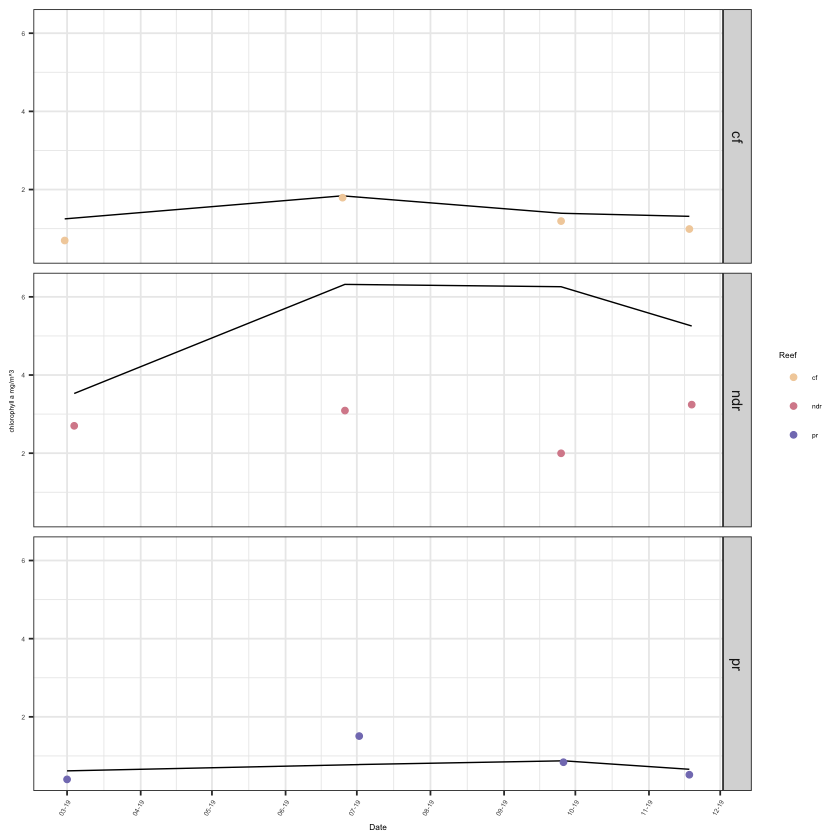

In [61]:
 chla_fig = chl_all %>%
subset(Date> "2019-1-01" & Date < "2019-12-01") %>%
filter(reef!="gr") %>%
 ggplot(aes(x = as.Date(Date), y = 	avg_chla_monthly_.mg.m.3.)) +
geom_line(aes(x = as.Date(Date), y = 	avg_chla_monthly_.mg.m.3.), colour="black", size=0.4) +
geom_point(aes(x = as.Date(Date), y = avg_chla_8day_.mg.m.3., color=reef)) +
#geom_point(alpha = 0.5, data = trip_dates, aes(x = as.Date(Date), y = avgchla_mgm.3, color=reef)) +



theme_bw() +
scale_color_manual(values=c("#f2d0a9","#d88c9a","#837dbe")) +
scale_x_date(date_breaks ="1 month", date_labels ="%m-%y") +
facet_grid(reef~.) +
theme(axis.text.x=element_text(angle = 60, hjust=1)) +
xlab("Date") +
ylab(expression("chlorophyll a mg/m^3 ")) +
guides(color=guide_legend(title="Reef")) +
theme(legend.text =element_text(size=3.7)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 4)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5))
chla_fig
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/chla_fig.png", width = 5, height = 4, units = "in", dpi=300)

In [65]:
head(temp_all)

,month,year,decimal_year,avg_sst,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<date>
1,Jan,2019,2019.003,24.96226,cf,2019-01-01
2,Jan,2019,2019.005,25.10979,cf,2019-01-02
3,Jan,2019,2019.008,25.14815,cf,2019-01-03
4,Jan,2019,2019.011,25.41415,cf,2019-01-04
5,Jan,2019,2019.014,25.37185,cf,2019-01-05
6,Jan,2019,2019.016,25.49293,cf,2019-01-06


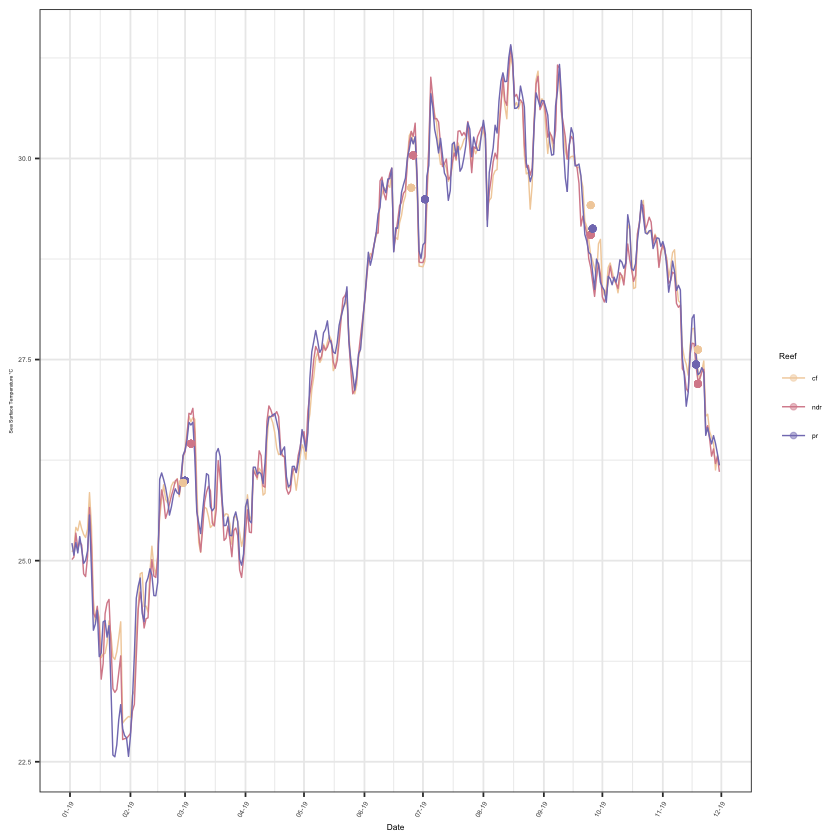

In [69]:
sst_fig = temp_all %>%
subset(Date> "2019-1-01" & Date < "2019-12-01") %>%
 ggplot(aes(x = as.Date(Date), y = avg_sst)) +
geom_line(aes(x = as.Date(Date), y = avg_sst, color=reef), size=0.4) +
geom_point(alpha = 0.5, data = trip_dates, aes(x = as.Date(Date), y = avgSST_degC, color=reef)) +
#geom_jitter(alpha = 0.5, data = trip_dates, aes(x = as.Date(Date), y = avg_sst)) +
theme_bw() +
scale_color_manual(values=c("#f2d0a9","#d88c9a","#837dbe")) +
scale_x_date(date_breaks ="1 month", date_labels ="%m-%y") +
#facet_grid(reef~.) +
theme(axis.text.x=element_text(angle = 60, hjust=1)) +
xlab("Date") +
ylab("Sea Surface Temperature °C") +
guides(color=guide_legend(title="Reef")) +
theme(legend.text =element_text(size=3.7)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 3)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5))
sst_fig
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/temp_fig.png", width = 5, height = 4, units = "in", dpi=300)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


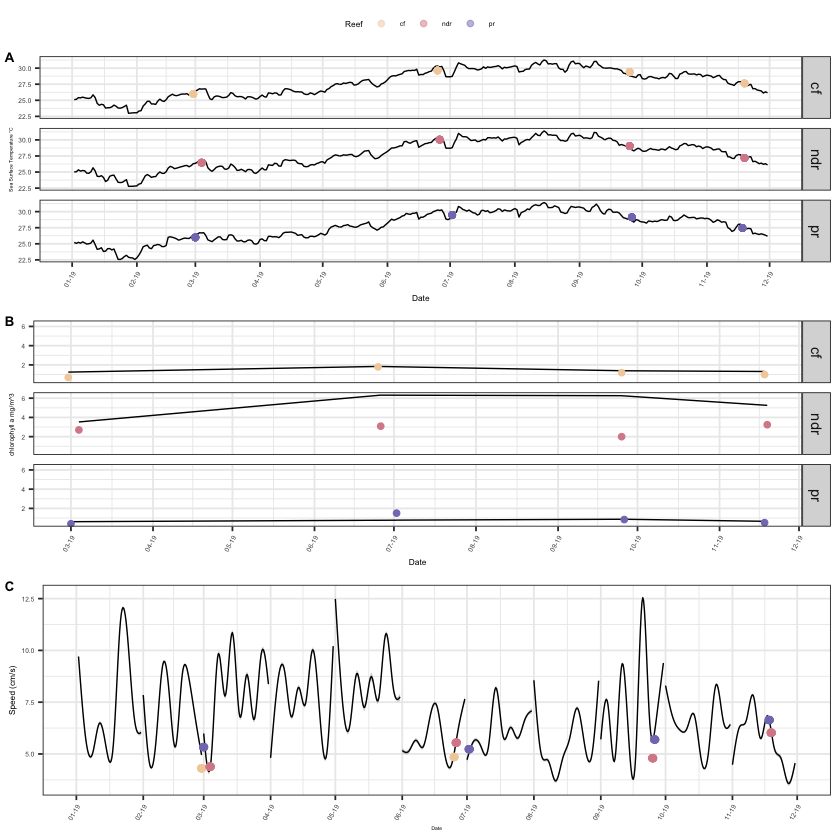

In [62]:
 ggpubr::ggarrange(sst_fig, chla_fig, tcm_fig,
                  common.legend = T, ncol=1,
                labels = c("A", "B", "C"), font.label = list(size = 8))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/env_fig.png", width = 5.5, height = 5, units = "in", dpi=300)     

In [ ]:
colnames(all_meta)

In [ ]:
#write.csv(all_meta, "/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv", 
 #      row.names = FALSE)

In [ ]:
unique(meta$collection_date)